Verificando/Criando a pasta de destino: Imagens_HighBoost
Carregando a imagem: carro_o_d_01.jpg
Aplicando borramento Gaussiano com sigma=3.0...
Salvando imagens...
Exibindo resultados...


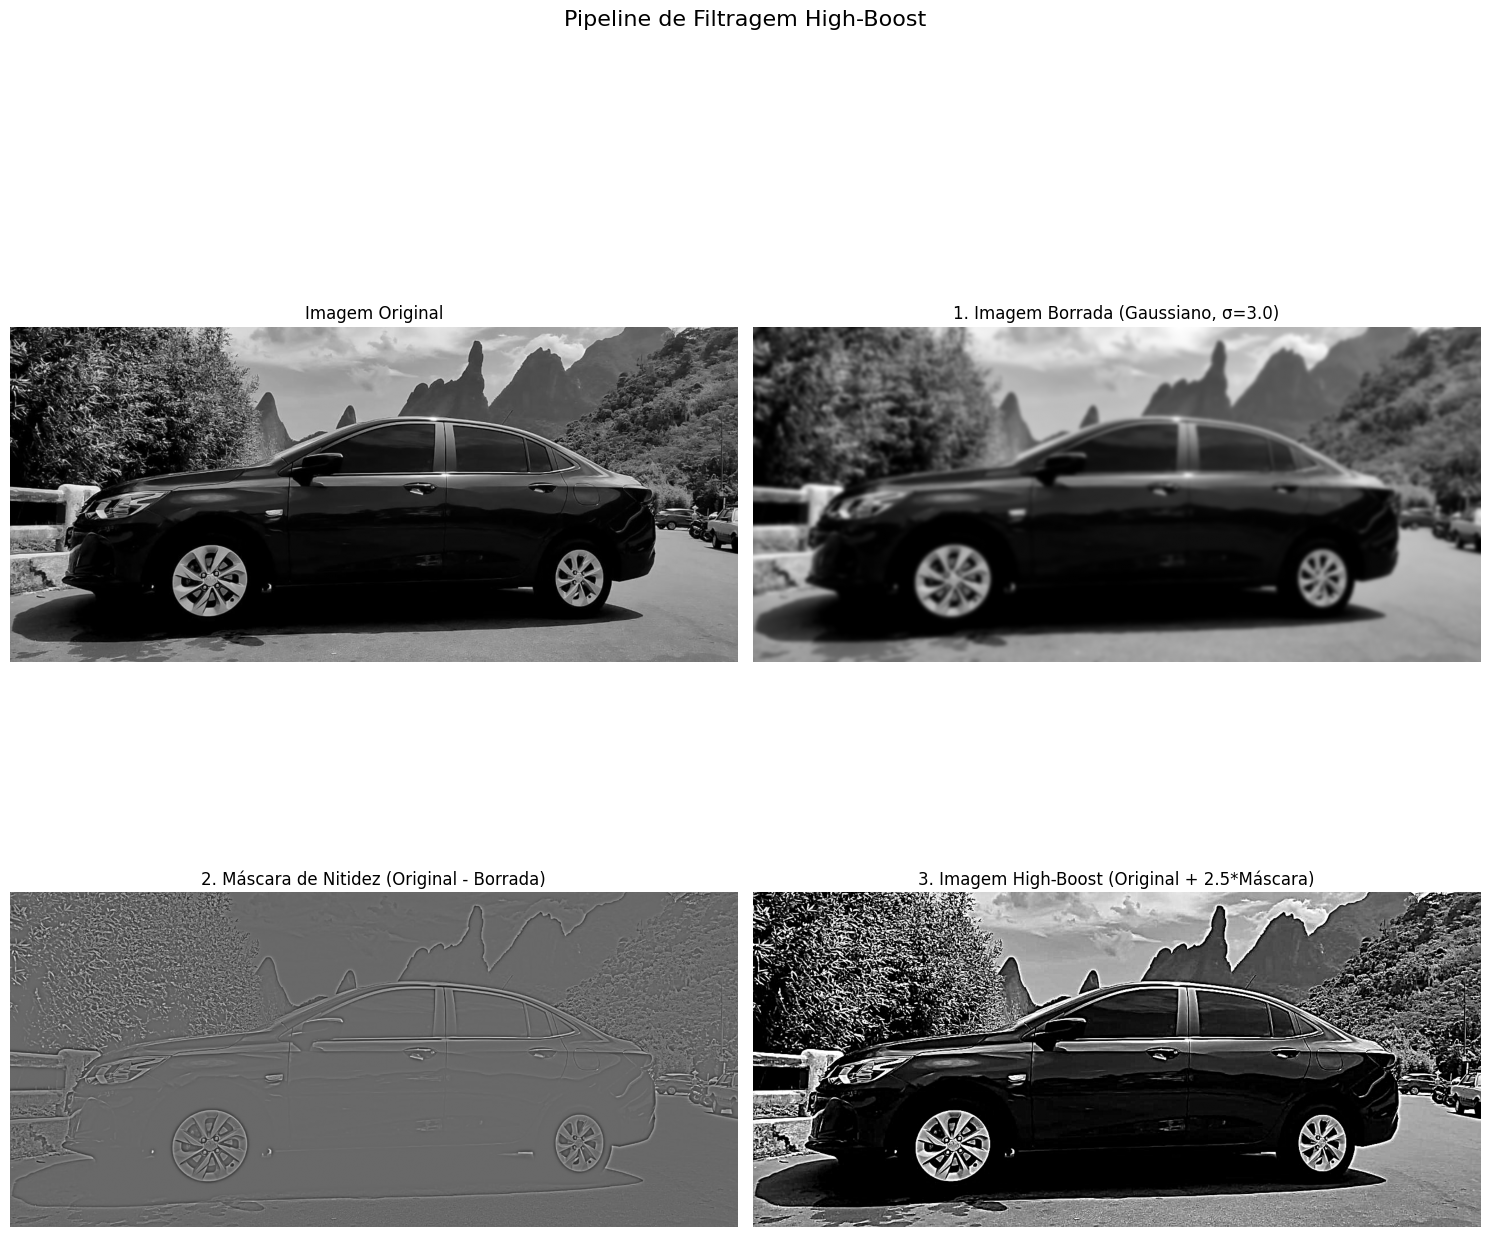



Processo finalizado!


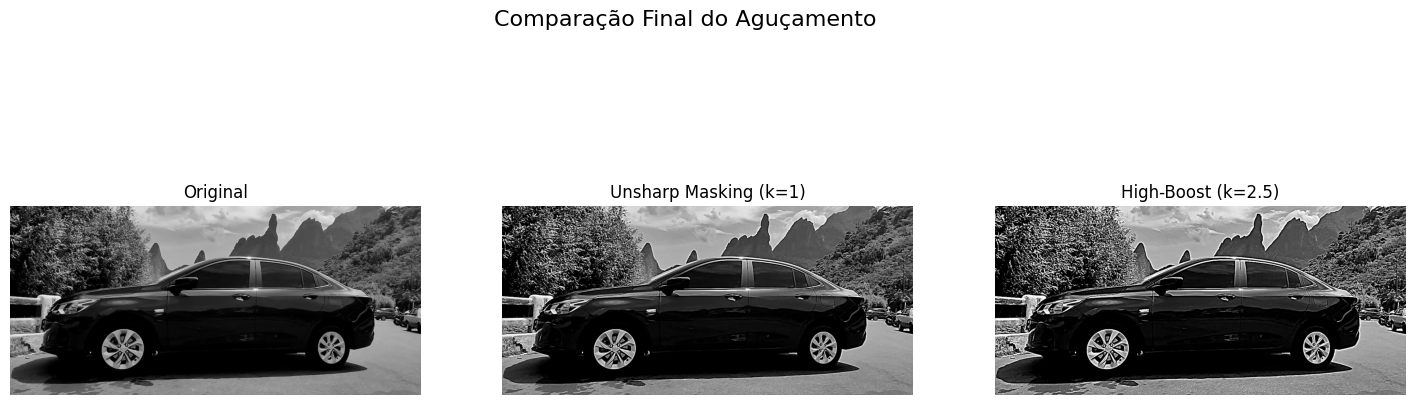

In [1]:


# Passo 1: Importar as bibliotecas necessárias
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure # CORREÇÃO: Adicionado 'exposure'
from skimage.util import img_as_ubyte, img_as_float

# --- SEÇÃO DE CONFIGURAÇÃO ---

IMAGEM_PARA_PROCESSAR = ('Imagens', 'carro_o_d_01.jpg') 

# Parâmetros para os filtros
SIGMA_GAUSSIANO = 3.0 # Controla a intensidade do borramento inicial
K_HIGHBOOST = 2.5     # Fator de "impulso" para o high-boost. k=1 é unsharp masking.

# Pasta onde salvaremos os resultados
PASTA_SAIDA = 'Imagens_HighBoost'
# --------------------------------

# Passo 2: Preparar a pasta de saída e o caminho da imagem
print(f"Verificando/Criando a pasta de destino: {PASTA_SAIDA}")
os.makedirs(PASTA_SAIDA, exist_ok=True)
caminho_entrada = os.path.join(IMAGEM_PARA_PROCESSAR[0], IMAGEM_PARA_PROCESSAR[1])

# Passo 3: Carregar a imagem e convertê-la para float e tons de cinza
print(f"Carregando a imagem: {IMAGEM_PARA_PROCESSAR[1]}")
imagem_original = io.imread(caminho_entrada)
imagem_cinza_float = img_as_float(color.rgb2gray(imagem_original))

# --- Passo 4: APLICAÇÃO DA TÉCNICA ---

# 4.1. Borrar a imagem com um filtro Gaussiano
print(f"Aplicando borramento Gaussiano com sigma={SIGMA_GAUSSIANO}...")
imagem_borrada = filters.gaussian(imagem_cinza_float, sigma=SIGMA_GAUSSIANO)

# 4.2. Criar a máscara de nitidez (Original - Borrada)
mascara_nitidez = imagem_cinza_float - imagem_borrada

# 4.3. Aplicar Unsharp Masking (k=1)
imagem_unsharp = imagem_cinza_float + mascara_nitidez

# 4.4. Aplicar High-Boost Filtering (k > 1)
imagem_highboost = imagem_cinza_float + (K_HIGHBOOST * mascara_nitidez)

# 4.5. Garantir que os valores dos pixels fiquem na faixa válida [0, 1]
imagem_unsharp = np.clip(imagem_unsharp, 0, 1)
imagem_highboost = np.clip(imagem_highboost, 0, 1)

# --- Passo 5: Salvar as imagens resultantes ---
print("Salvando imagens...")
nome_base = IMAGEM_PARA_PROCESSAR[1].split('.')[0]
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_borrada.jpg'), img_as_ubyte(imagem_borrada))
# A máscara precisa ser normalizada para ser salva como uma imagem visível
mascara_salvavel = img_as_ubyte(exposure.rescale_intensity(mascara_nitidez, out_range=(0, 1)))
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_mascara.jpg'), mascara_salvavel)
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_unsharp_k1.jpg'), img_as_ubyte(imagem_unsharp))
io.imsave(os.path.join(PASTA_SAIDA, f'{nome_base}_highboost_k{K_HIGHBOOST}.jpg'), img_as_ubyte(imagem_highboost))


# --- Passo 6: Visualizar todo o processo ---
print("Exibindo resultados...")
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

axes[0, 0].imshow(imagem_cinza_float, cmap='gray')
axes[0, 0].set_title('Imagem Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(imagem_borrada, cmap='gray')
axes[0, 1].set_title(f'1. Imagem Borrada (Gaussiano, σ={SIGMA_GAUSSIANO})')
axes[0, 1].axis('off')

axes[1, 0].imshow(mascara_nitidez, cmap='gray')
axes[1, 0].set_title('2. Máscara de Nitidez (Original - Borrada)')
axes[1, 0].axis('off')

axes[1, 1].imshow(imagem_highboost, cmap='gray')
axes[1, 1].set_title(f'3. Imagem High-Boost (Original + {K_HIGHBOOST}*Máscara)')
axes[1, 1].axis('off')

fig.suptitle('Pipeline de Filtragem High-Boost', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n\nProcesso finalizado!")

# Adicional: Comparação final lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(imagem_cinza_float, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(imagem_unsharp, cmap='gray')
axes[1].set_title('Unsharp Masking (k=1)')
axes[1].axis('off')
axes[2].imshow(imagem_highboost, cmap='gray')
axes[2].set_title(f'High-Boost (k={K_HIGHBOOST})')
axes[2].axis('off')
fig.suptitle('Comparação Final do Aguçamento', fontsize=16)
plt.show()